# DDoS Attack Classification - InSDN Dataset

**Table Of Content**

1. Importing Libraries
2. Data Pre-processing
3. Data Exploring
4. Data Splitting
5. Model Training
6. Model Evaluation



*Data link to download*: https://www.kaggle.com/datasets/badcodebuilder/insdn-dataset

## Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

from xgboost import XGBClassifier

## Data Exploring

In [51]:
# read csv files
df_normal = pd.read_csv("insdn-dataset/versions/2/InSDN_DatasetCSV/Normal_data.csv")
df_ovs = pd.read_csv("insdn-dataset/versions/2/InSDN_DatasetCSV/OVS.csv")
df_meta = pd.read_csv("insdn-dataset/versions/2/InSDN_DatasetCSV/metasploitable-2.csv")

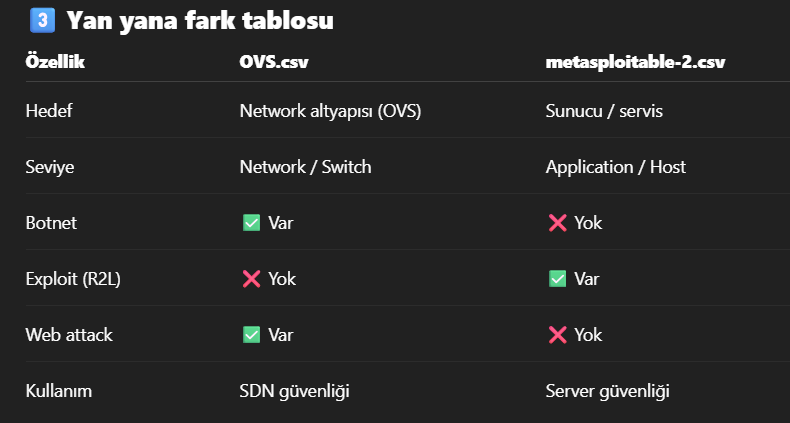

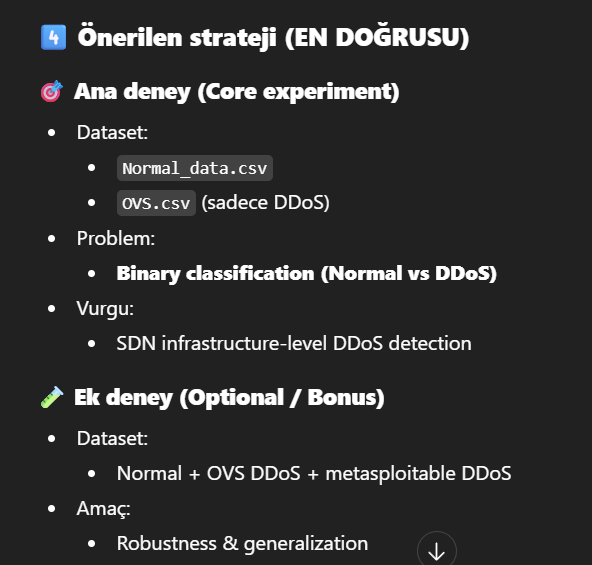

In [3]:
df_normal.shape

(68424, 84)

In [4]:
df_ovs.shape

(138722, 84)

In [5]:
df_meta.shape

(136743, 84)

In [6]:
df_normal.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [7]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68424 entries, 0 to 68423
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            68424 non-null  object 
 1   Src IP             68424 non-null  object 
 2   Src Port           68424 non-null  int64  
 3   Dst IP             68424 non-null  object 
 4   Dst Port           68424 non-null  int64  
 5   Protocol           68424 non-null  int64  
 6   Timestamp          68424 non-null  object 
 7   Flow Duration      68424 non-null  int64  
 8   Tot Fwd Pkts       68424 non-null  int64  
 9   Tot Bwd Pkts       68424 non-null  int64  
 10  TotLen Fwd Pkts    68424 non-null  float64
 11  TotLen Bwd Pkts    68424 non-null  float64
 12  Fwd Pkt Len Max    68424 non-null  int64  
 13  Fwd Pkt Len Min    68424 non-null  int64  
 14  Fwd Pkt Len Mean   68424 non-null  float64
 15  Fwd Pkt Len Std    68424 non-null  float64
 16  Bwd Pkt Len Max    684

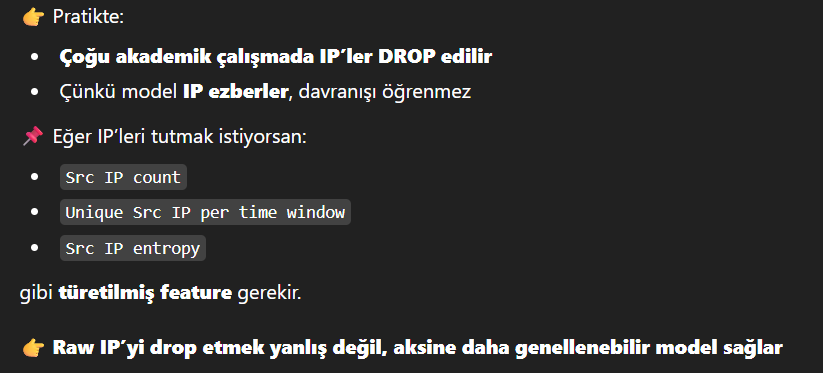

In [8]:
df_ovs.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,4045,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
1,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,284,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
2,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,4302,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
3,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,83,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
4,172.17.0.2-200.175.2.130-80-48860-6,200.175.2.130,48860,172.17.0.2,80,6,12/1/2020 1:14,3760,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA


In [9]:
# Types of the attacks
df_ovs.loc[:, 'Label'].unique()

array(['BFA', 'DDoS ', 'DoS', 'Probe', 'Web-Attack', 'BOTNET'],
      dtype=object)

In [10]:
df_ovs['Label'] = df_ovs['Label'].str.strip()
df_ovs.loc[:, 'Label'].unique()

array(['BFA', 'DDoS', 'DoS', 'Probe', 'Web-Attack', 'BOTNET'],
      dtype=object)

In [11]:
sum(df_ovs['Label'] == 'DDoS')

48413

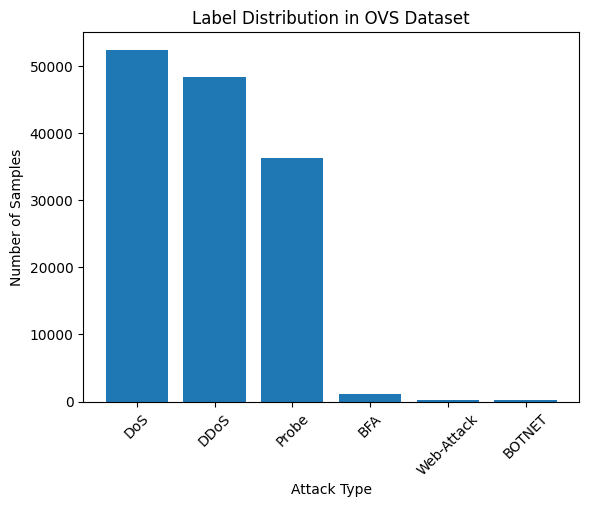

In [12]:
# show the label distribution
label_counts = df_ovs['Label'].value_counts()

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.title("Label Distribution in OVS Dataset")
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [13]:
# Normal -> label = 0
df_normal['Label'] = 0
df_normal['Label']

0        0
1        0
2        0
3        0
4        0
        ..
68419    0
68420    0
68421    0
68422    0
68423    0
Name: Label, Length: 68424, dtype: int64

In [14]:
ovs_ddos = df_ovs[df_ovs["Label"] == "DDoS"].copy()
ovs_ddos.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1110,192.168.20.134-122.37.162.153-0-0-0,122.37.162.153,0,192.168.20.134,0,0,4/2/2020 15:20,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1111,192.168.20.134-201.199.251.61-0-0-0,201.199.251.61,0,192.168.20.134,0,0,4/2/2020 15:20,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1112,187.149.196.242-192.168.20.134-0-0-0,187.149.196.242,0,192.168.20.134,0,0,4/2/2020 15:20,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1113,192.168.20.134-62.74.175.18-0-0-0,62.74.175.18,0,192.168.20.134,0,0,4/2/2020 15:20,2,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1114,192.168.20.134-82.62.99.149-0-0-0,82.62.99.149,0,192.168.20.134,0,0,4/2/2020 15:20,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


In [15]:
# DDoS -> label = 1
ovs_ddos["Label"] = 1
ovs_ddos['Label']

1110     1
1111     1
1112     1
1113     1
1114     1
        ..
49518    1
49519    1
49520    1
49521    1
49522    1
Name: Label, Length: 48413, dtype: int64

In [16]:
df_normal_ddos = pd.concat([df_normal, ovs_ddos], ignore_index=True)
df_normal_ddos['Label']

0         0
1         0
2         0
3         0
4         0
         ..
116832    1
116833    1
116834    1
116835    1
116836    1
Name: Label, Length: 116837, dtype: int64

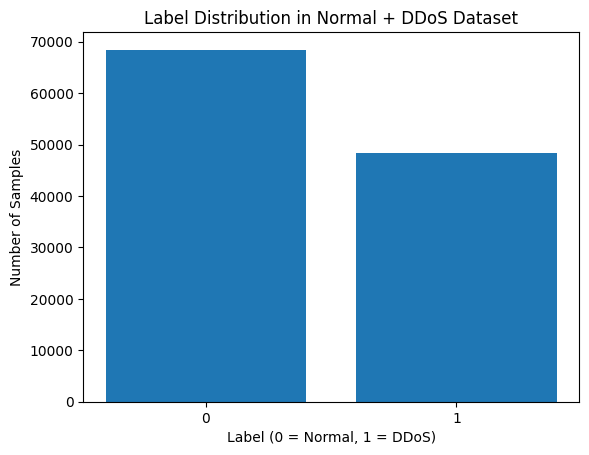

In [17]:
# show the label distribution for normal + ddos
label_counts = df_normal_ddos['Label'].value_counts()

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Label (0 = Normal, 1 = DDoS)")
plt.ylabel("Number of Samples")
plt.title("Label Distribution in Normal + DDoS Dataset")
plt.xticks([0, 1])
plt.show()

In [18]:
df_normal_ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116837 entries, 0 to 116836
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            116837 non-null  object 
 1   Src IP             116837 non-null  object 
 2   Src Port           116837 non-null  int64  
 3   Dst IP             116837 non-null  object 
 4   Dst Port           116837 non-null  int64  
 5   Protocol           116837 non-null  int64  
 6   Timestamp          116837 non-null  object 
 7   Flow Duration      116837 non-null  int64  
 8   Tot Fwd Pkts       116837 non-null  int64  
 9   Tot Bwd Pkts       116837 non-null  int64  
 10  TotLen Fwd Pkts    116837 non-null  float64
 11  TotLen Bwd Pkts    116837 non-null  float64
 12  Fwd Pkt Len Max    116837 non-null  int64  
 13  Fwd Pkt Len Min    116837 non-null  int64  
 14  Fwd Pkt Len Mean   116837 non-null  float64
 15  Fwd Pkt Len Std    116837 non-null  float64
 16  Bw

In [19]:
# Show the columns if there is missing values
df_normal_ddos.columns[df_normal_ddos.isnull().any()]

Index([], dtype='object')

## Data Splitting

In [20]:
X = df_normal_ddos.drop(columns=["Flow ID", "Src IP", "Dst IP", "Timestamp", "Label"])
y = df_normal_ddos["Label"]

# Split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

In [21]:
print("The train dataset size: ", X_train.shape)
print("The test dataset size: ", X_test.shape)

The train dataset size:  (81785, 79)
The test dataset size:  (35052, 79)


## Model Training - NORMAL + DDOS dataset

### Random Forest

In [22]:
# Random Forest with class_weight parameter
rf_model = RandomForestClassifier(
n_estimators=50,
max_depth=10,
random_state=42,
class_weight='balanced'
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [23]:
# accuracy of the test set
accuracy_score(y_test, rf_pred)

0.9999714709574347

In [24]:
rf_train_pred = rf_model.predict(X_train)

In [25]:
accuracy_score(y_train, rf_train_pred)

1.0

In [26]:
confusion_matrix(y_test, rf_pred)

array([[20528,     0],
       [    1, 14523]])

In [27]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20528
           1       1.00      1.00      1.00     14524

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



In [57]:
#FNR
recall = recall_score(y_test, rf_pred)
1-recall

6.885155604519078e-05

In [28]:
# Feature Importance
fi = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

fi.head(15)

Src Port            0.160035
Protocol            0.138481
Bwd Header Len      0.130472
Tot Fwd Pkts        0.071407
Dst Port            0.065632
Flow IAT Max        0.062530
Subflow Fwd Pkts    0.053264
Pkt Len Max         0.045992
Fwd Header Len      0.035218
Pkt Len Var         0.030024
Flow IAT Std        0.029308
Fwd Pkt Len Mean    0.027627
Bwd Pkts/s          0.021939
Bwd IAT Max         0.018978
Flow Byts/s         0.015457
dtype: float64

In [29]:
df_corr = X.copy()
df_corr["Label"] = y

corr = df_corr.corr()["Label"].sort_values(ascending=False)

corr.head(10), corr.tail(10)

(Label               1.000000
 Bwd Pkts/s          0.893589
 Flow Pkts/s         0.888680
 Tot Fwd Pkts        0.001295
 Subflow Fwd Pkts    0.001295
 TotLen Fwd Pkts    -0.013832
 Subflow Fwd Byts   -0.013836
 RST Flag Cnt       -0.016327
 Bwd IAT Min        -0.023892
 Flow IAT Min       -0.025088
 Name: Label, dtype: float64,
 CWE Flag Count      NaN
 ECE Flag Cnt        NaN
 Fwd Byts/b Avg      NaN
 Fwd Pkts/b Avg      NaN
 Fwd Blk Rate Avg    NaN
 Bwd Byts/b Avg      NaN
 Bwd Pkts/b Avg      NaN
 Bwd Blk Rate Avg    NaN
 Init Fwd Win Byts   NaN
 Fwd Seg Size Min    NaN
 Name: Label, dtype: float64)

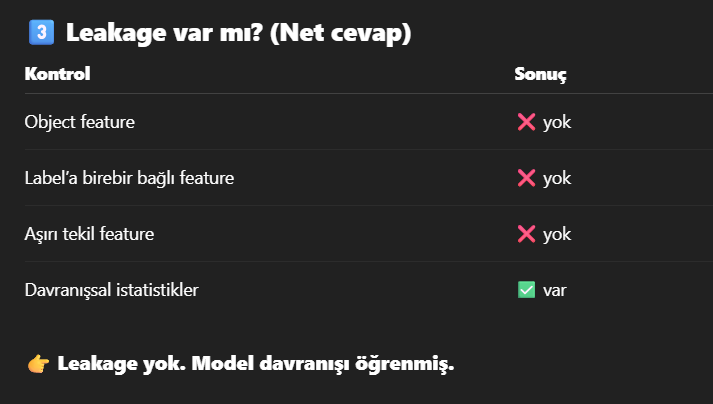

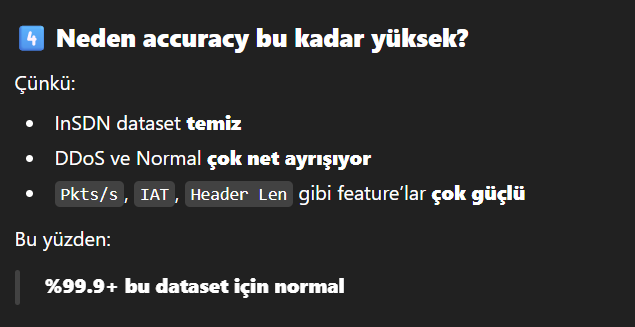

### XGBoost

In [30]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [31]:
accuracy_score(y_test, xgb_pred)

0.9999429419148693

In [32]:
xgb_train_pred = xgb.predict(X_train)

In [33]:
accuracy_score(y_train, xgb_train_pred)

0.9999877728189766

In [34]:
confusion_matrix(y_test, xgb_pred)

array([[20527,     1],
       [    1, 14523]])

In [35]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20528
           1       1.00      1.00      1.00     14524

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



In [56]:
#FNR
recall = recall_score(y_test, xgb_pred)
1-recall

6.885155604519078e-05

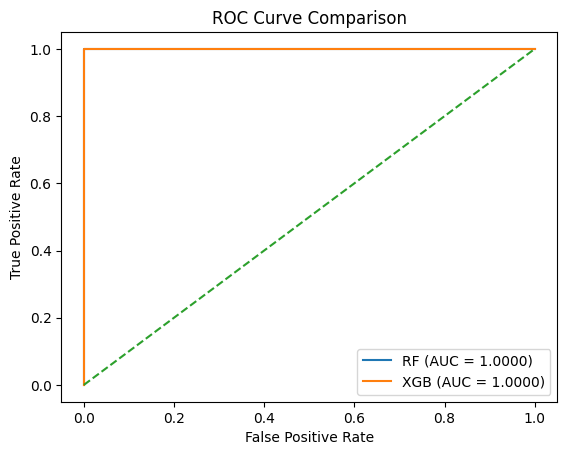

In [36]:
# Probability scores
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# ROC values
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost probabilities
xgb_probs = xgb.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {auc_rf:.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGB (AUC = {auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [37]:
# Cross validation - RF model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=skf,
    scoring="roc_auc"
)

scores.mean(), scores.std()


(np.float64(0.9999896416792323), np.float64(2.0716641535478698e-05))

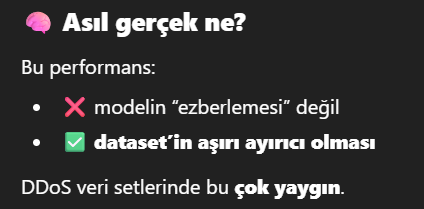

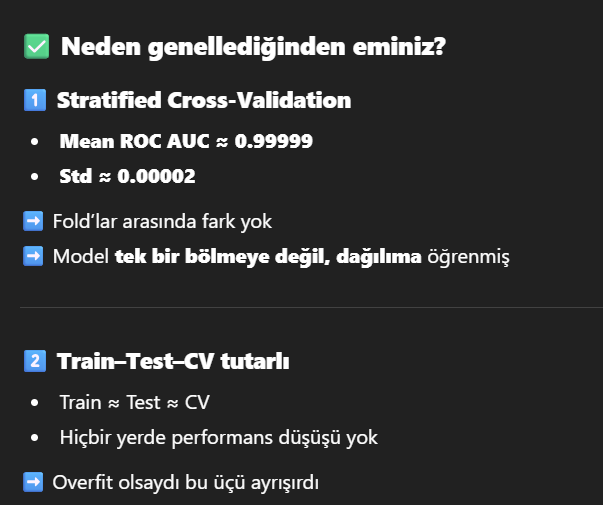

In [38]:
#important features for XGBoost
importance = xgb.get_booster().get_score(importance_type="gain")

fi_df = pd.DataFrame(
    importance.items(),
    columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

top10_features = fi_df["Feature"].head(10).tolist()
top10_features

['Dst Port',
 'Bwd Header Len',
 'Src Port',
 'Protocol',
 'Flow Duration',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Fwd IAT Mean',
 'Tot Fwd Pkts',
 'Fwd IAT Min']

In [39]:
X_top10_xgb = X[top10_features]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_top10_xgb,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [41]:
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [42]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

acc, auc

(0.9999714709574347, 0.9999999932919372)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20528
           1       1.00      1.00      1.00     14524

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



In [44]:
confusion_matrix(y_test, y_pred)

array([[20527,     1],
       [    0, 14524]])

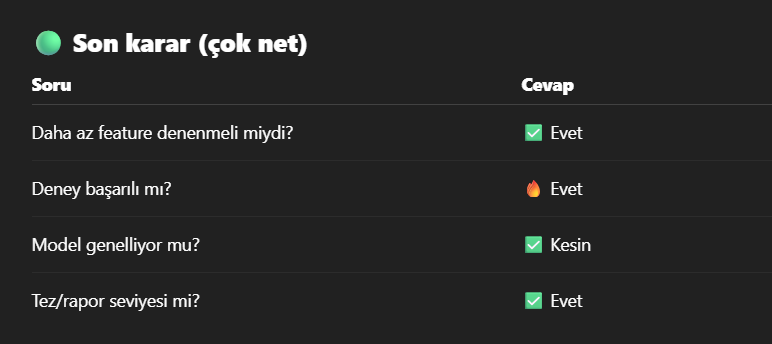

Epoch 1/20


/home/asus/apps/ids-test/notebook/jupyter/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1151/1151 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0441 - val_accuracy: 0.9996 - val_loss: 9.8795e-04
Epoch 2/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0034 - val_accuracy: 0.9999 - val_loss: 5.9996e-04
Epoch 3/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 5.1475e-04
Epoch 4/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9999 - val_loss: 5.0856e-04
Epoch 5/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 5.3780e-04
Epoch 6/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 4.5571e-04
Epoch 7/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 4.4828e-04
Epoch 8/20
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 

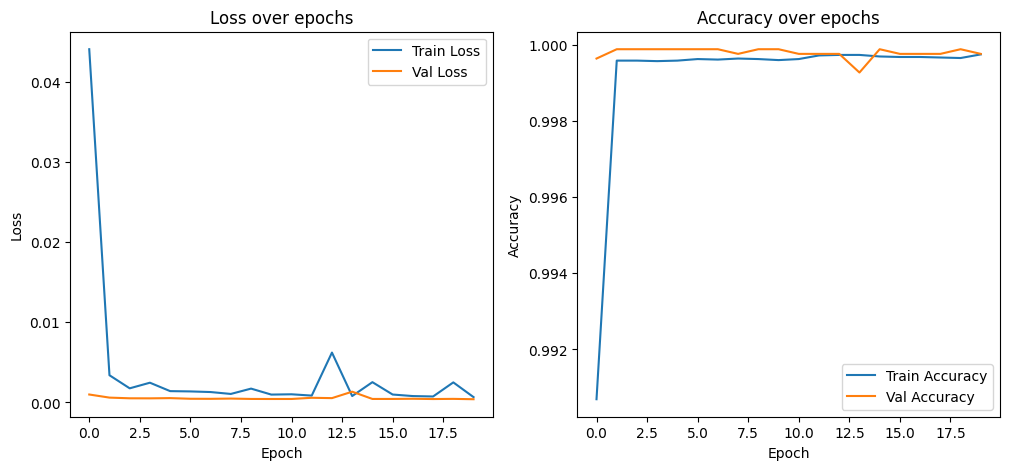

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Featureları scale et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ ANN modelini oluştur
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# 3️⃣ Compile et
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4️⃣ Eğit
history = model.fit(X_train_scaled, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_split=0.1)

# 5️⃣ Test performansı
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 6️⃣ Loss ve Accuracy grafiği
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [58]:
#FNR
recall = recall_score(y_test, y_pred)
1-recall

0.00013770311209038155